## Classification.

Response variable is 'Categorical'.

The methods used for classification first predict the probability of each of the categories.

### Why not Linear regression?
For a binary qualitative respone we may fit a linear regression after dummy encoding. But with response variable with more than two class it becomes impossible to fit as the way we encode our response variable will change the entire model and hence the estimates and prediction.

But even though we can fit a linear regression on data with binary response variable some of the estimates might lie beyond the [0,1] interval making them hard to interpret as probabilities.

### Logistic Regression.

Models the probability that Y belongs to a particular category.

p(X) = e^(b0+b1x)/1+e^(b0+b1x)  -(1)

e^(b0+b1x) = p(X)/1-p(X)

log(p(X)/1-p(X)) = b0+b1x  -> log-odds or logit.

### Estimating the Regression Coefficient.

Maximum Likelihood is used to estimate the coefficient b0, b1 etc.

The estimates are generated are such that the value (1) becomes close to one of the class observed in the data sets.

z-statistics is same as the t-statistics from Linear Regression. Basically it is used to validate the null hypothesis H0 i.e. there is no relation between the variables and the response.

Logistic regression can be extended for problems involving more than 2 categories but other models such as Linear Discriminant Analysis are preferred.

### Linear Discriminant Analysis.

In this model we model the distribution of predictors and then uses Bayes Theorem to flip these distribution around into estimates.

Assumes that the observation from each class follows Gaussian Distribution.

LDA compared to Logistic Regression.

1. LDA is more stable than Logistic Regression when class is well separated.
2. When n is small and distribution of the predictor is normal in each class then LDA is more stable.


Accuracy of classification model:
1. Confusion Matrix
2. ROC curve (reciever operating characteristics)

Variants of LDA -> Quadratic Discriminant Analysis -> unlike LDA assumes that each class have their own covariance matrix.

LDA has the advantage over QDA in the terms that it estimates tha covariance matrix which brings down the number of parameter estimates.(same as in Linear Regression where we make assumption of linear shape of function).

The coefficient in LDA is estimated usingmean and variance from normal distribution.


In [100]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import *

In [101]:
#Reading the Smarket data sets
Smarket = pd.read_csv(r'C:\Users\Vikram\Desktop\ISLR\Data\Smarket.csv', header='infer', index_col='Column1')

In [102]:
# columns in our data sets
list(Smarket.columns)

['Year',
 'Lag1',
 'Lag2',
 'Lag3',
 'Lag4',
 'Lag5',
 'Volume',
 'Today',
 'Direction']

In [103]:
# Exploring the data sets
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [104]:
# dimension of our data sets we have 1250 observation and 9 columns
Smarket.shape

(1250, 9)

In [105]:
# correlation matrix
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

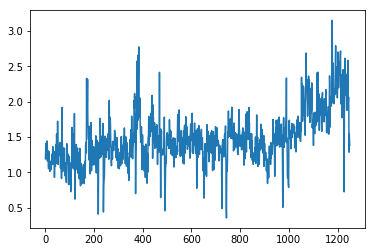

In [107]:
plt.plot(Smarket.Volume)

In [108]:
# dividing the data set in training and test, Also coding up as '1' and down as '0' in order to calculate the score and create
# ROC curve

Smarket_y_train = Smarket.Direction.head(1000)
Smarket_y_train= np.where(Smarket_y_train.values == 'Up',1,0)
Smarket_y_test = Smarket.Direction.tail(250)
Smarket_y_test= np.where(Smarket_y_test.values == 'Up',1,0)
Smarket_x_train = Smarket.loc[:, Smarket.columns != 'Direction'].head(1000)
Smarket_x_test = Smarket.loc[:, Smarket.columns != 'Direction'].tail(250)

In [109]:
# Fitting a logistic regression using statsmodel library to imitate R powerful summary(). As shown below the p value are 
# not significant therefore we can not reject the null hypothesis H0

import statsmodels.api as sm
model = sm.Logit(Smarket_y_train,Smarket_x_train.astype(float))
result = model.fit()
print(result.summary2())

         Current function value: 0.000126
         Iterations: 35
                          Results: Logit
Model:              Logit            Pseudo R-squared: 1.000      
Dependent Variable: y                AIC:              16.2516    
Date:               2018-12-08 18:53 BIC:              55.5137    
No. Observations:   1000             Log-Likelihood:   -0.12582   
Df Model:           7                LL-Null:          -693.05    
Df Residuals:       992              LLR p-value:      4.4557e-295
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
Year       -0.0148    0.0188  -0.7893  0.4300    -0.0517     0.0220
Lag1       -1.3378    5.7210  -0.2338  0.8151   -12.5507     9.8752
Lag2        4.286

C:\Users\Vikram\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [110]:
# fitting a Logistic Regression model using sklearn library.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
clf = LogisticRegression(solver='liblinear')
clf.fit(Smarket_x_train,Smarket_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
# The accuracy of out model is awesome its 99% accurate

clf.score(Smarket_x_train,Smarket_y_train)

0.992

In [112]:
# metrics used to validate classification model precision, recall and given the number we can say that our model is accurate

clf.predict(Smarket_x_test)
print(classification_report(clf.predict(Smarket_x_test),Smarket_y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       111
           1       0.99      1.00      0.99       139

   micro avg       0.99      0.99      0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [113]:
# confusion matrix : A way to visualize the performance of our classifier.

confusion_matrix(Smarket_y_test, clf.predict(Smarket_x_test))

array([[109,   0],
       [  2, 139]], dtype=int64)

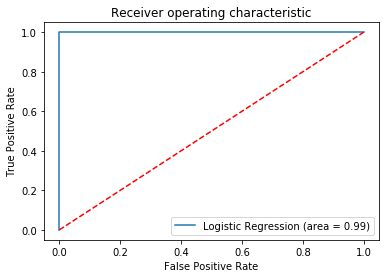

In [117]:
# ROC curve tells us how well our model is doing. In ideal case it should be touching the top left corner of the graph as in 
# case of our model and area-under-curve is 0.99 which is close to 1.

logit_roc_auc = roc_auc_score(Smarket_y_test,clf.predict(Smarket_x_test))
fpr, tpr, thresholds = roc_curve(Smarket_y_test, clf.predict_proba(Smarket_x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()